In [16]:
#Data.csv

**Step 1: Importing the libraries**

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Step 2: Importing dataset**

In [18]:
df = pd.read_csv('Data.csv')

In [19]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 3: Handling the missing data**

In [20]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [21]:
df['Age'] = df['Age'].fillna(value = df['Age'].mean())
df['Salary'] = df['Salary'].fillna(value = df['Salary'].mean())

In [22]:
df.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

**Step 4: Encoding categorical data**

In [23]:
df['Country'].value_counts(), df['Purchased'].value_counts()

(France     4
 Spain      3
 Germany    3
 Name: Country, dtype: int64,
 No     5
 Yes    5
 Name: Purchased, dtype: int64)

In [24]:
# label encoding for purchased column, because it contains only yes or no

df['Purchased'] = df['Purchased'].map({'Yes' : 1, 'No' : 0})

In [25]:
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,0
1,Spain,27.000000,48000.000000,1
2,Germany,30.000000,54000.000000,0
3,Spain,38.000000,61000.000000,0
4,Germany,40.000000,63777.777778,1
5,France,35.000000,58000.000000,1
6,Spain,38.777778,52000.000000,0
7,France,48.000000,79000.000000,1
8,Germany,50.000000,83000.000000,0
9,France,37.000000,67000.000000,1


**Step 5: Creating a dummy variable**

In [26]:
country_dummies = pd.get_dummies(df['Country'])

In [38]:
df = pd.concat([df, country_dummies], axis = 1)
df.drop(['Country'], axis = 1, inplace = True)
df

,Age,Salary,Purchased,France,Germany,Spain,France,Germany,Spain
0,44.000000,72000.000000,0,1,0,0,1,0,0
1,27.000000,48000.000000,1,0,0,1,0,0,1
2,30.000000,54000.000000,0,0,1,0,0,1,0
3,38.000000,61000.000000,0,0,0,1,0,0,1
4,40.000000,63777.777778,1,0,1,0,0,1,0
5,35.000000,58000.000000,1,1,0,0,1,0,0
6,38.777778,52000.000000,0,0,0,1,0,0,1
7,48.000000,79000.000000,1,1,0,0,1,0,0
8,50.000000,83000.000000,0,0,1,0,0,1,0
9,37.000000,67000.000000,1,1,0,0,1,0,0


**Step 6: Splitting the datasets into training sets and Test sets**

In [39]:
X = df.drop(['Purchased'], axis = 1)
y = df[['Purchased']]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Step 7: Feature Scaling**

In [41]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [55]:
# scaling of salary column using standard scaler

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

C:\Users\wiki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wiki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

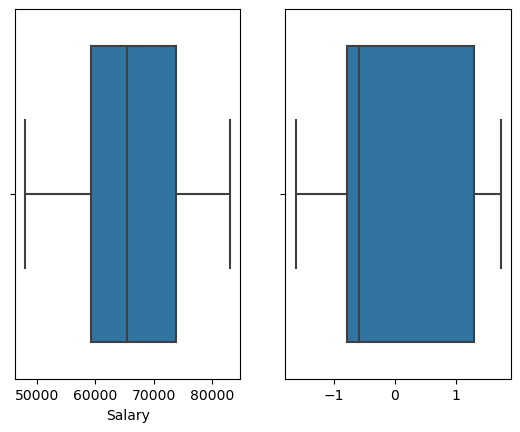

In [54]:
plt.subplot(1,2,1)
sns.boxplot(X_train.Salary)
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)